In [1]:
import numpy as np
from scipy.fft import fft2, fftshift
from numpy import load
import matplotlib.pyplot as plt
import skimage
import cv2

In [2]:
data = load('model/k49-train-imgs.npz')
lst = data.files
kanjis = list()
for item in lst:
    print(item)
    kanjis.append(data[item])

arr_0


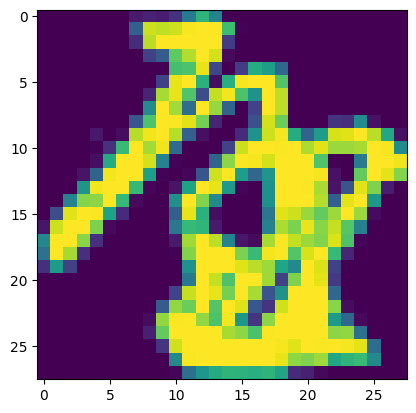

In [3]:
plt.imshow(kanjis[0][6])

In [4]:
def fft2c(x: np.ndarray) -> np.ndarray:
    return fftshift(fft2(fftshift(x)))

In [5]:
def ifft2c(x: np.ndarray) -> np.ndarray:
    return fftshift(np.fft.ifft2(fftshift(x)))

In [6]:
IMG_NAME = "image_kanjis.png"

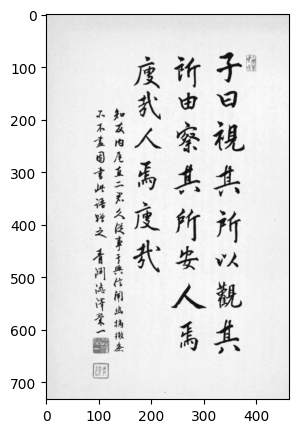

In [7]:
# B&W Convertion
img = cv2.imread("./images/"+IMG_NAME)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(img, cmap='gray')
plt.show()

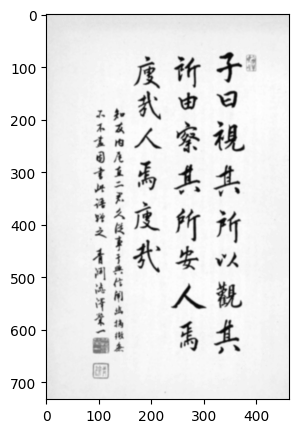

In [8]:
# Blurred
blurred_image = cv2.GaussianBlur(img, (5, 5), 0)

fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(blurred_image, cmap='gray')
plt.show()

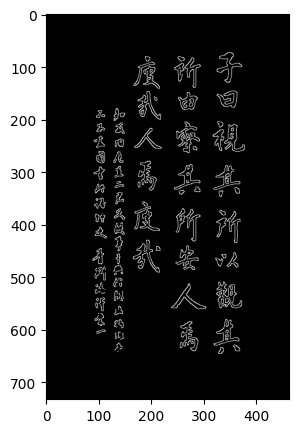

In [9]:
# Canny
canny_image = cv2.Canny(blurred_image, 225, 255)

fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(canny_image, cmap='gray')
plt.show()

In [10]:
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
contours[0].max(axis=0)

array([[137, 642]], dtype=int32)

In [12]:
type(contours)

tuple

In [13]:
square_sections = []
square_contours = []
for contour in contours:
    highest = contour.max(axis=0)[0]
    lowest = contour.min(axis=0)[0]
    square_contours.append(
        np.array(
            [
                np.array([[lowest[0], lowest[1]]]),
                np.array([[lowest[0], highest[1]]]),
                np.array([[highest[0], highest[1]]]),
                np.array([[highest[0], lowest[1]]]),
                np.array([[lowest[0], lowest[1]]]),
            ]
        )
    )
    square_sections.append(((lowest[1], (highest[1]+1)), (lowest[0], (highest[0]+1))))


In [14]:
square_contours = tuple(square_contours)

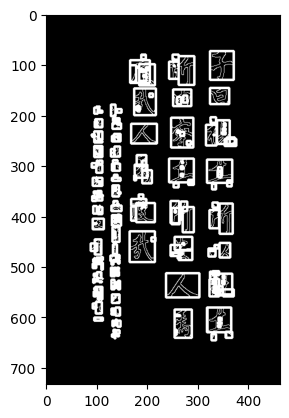

In [15]:
plt.imshow(cv2.drawContours(canny_image, square_contours, -1, 255, 3), cmap="grey")

In [16]:
canny_image[square_sections[0][0], square_sections[0][1]]

array([255, 255], dtype=uint8)

In [17]:
square_sections[0]

((np.int32(641), np.int32(643)), (np.int32(135), np.int32(138)))

In [18]:
SECTION_NTH = 0

In [19]:
canny_image[square_sections[SECTION_NTH][0][0]:square_sections[SECTION_NTH][0][1], square_sections[SECTION_NTH][1][0]:square_sections[SECTION_NTH][1][1]]

array([[255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [20]:
canny_image.shape

(733, 463)

In [21]:
canny_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)